# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import json
import random
import requests
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from api_keys import weather_api_key


## Generate Cities List

In [3]:
latitude_data = np.random.randint(low=-90, high=90, size=1600)
longitude_data = np.random.randint(low=-180, high=180, size=1600)

coordinates = list(zip(latitude_data, longitude_data))

cities = []
for coordinate in coordinates:
    lat, lon = coordinate
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list:
    if city not in cities:
        cities.append(city)

print(len(cities))

648


In [4]:
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url=f'{url}appid={weather_api_key}&units={units}&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set empty lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count=1

print('Beginning Data Retrieval')     
print('-----------------------------')

for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])  
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])  
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])   
            country.append(response['sys']['country'])
            date.append(response['dt'])     
    
        except KeyError:
            
            print(city + ' City not found. Skipping...') 
            
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 648 | geraldton
Processing Record 2 of 648 | mahebourg
Processing Record 3 of 648 | east london
Processing Record 4 of 648 | busselton
Processing Record 5 of 648 | castro
Processing Record 6 of 648 | belushya guba
belushya guba City not found. Skipping...
Processing Record 7 of 648 | leh
Processing Record 8 of 648 | bethel
Processing Record 9 of 648 | punta arenas
Processing Record 10 of 648 | bowen
Processing Record 11 of 648 | ternate
Processing Record 12 of 648 | hami
Processing Record 13 of 648 | kodiak
Processing Record 14 of 648 | iqaluit
Processing Record 15 of 648 | naryan-mar
Processing Record 16 of 648 | rikitea
Processing Record 17 of 648 | ancud
Processing Record 18 of 648 | vaini
Processing Record 19 of 648 | bardiyah
Processing Record 20 of 648 | ponta do sol
Processing Record 21 of 648 | marquette
Processing Record 22 of 648 | hilo
Processing Record 23 of 648 | tomatlan
Processing Record 24 of 

Processing Record 189 of 648 | jian
Processing Record 190 of 648 | mpanda
Processing Record 191 of 648 | necochea
Processing Record 192 of 648 | broken hill
Processing Record 193 of 648 | pacific grove
Processing Record 194 of 648 | ola
Processing Record 195 of 648 | aksu
Processing Record 196 of 648 | tuatapere
Processing Record 197 of 648 | juneau
Processing Record 198 of 648 | waingapu
Processing Record 199 of 648 | lavrentiya
Processing Record 200 of 648 | manjacaze
Processing Record 201 of 648 | ouesso
Processing Record 202 of 648 | shaartuz
shaartuz City not found. Skipping...
Processing Record 203 of 648 | yarmouth
Processing Record 204 of 648 | avera
Processing Record 205 of 648 | henties bay
Processing Record 206 of 648 | sorvag
sorvag City not found. Skipping...
Processing Record 207 of 648 | kafanchan
Processing Record 208 of 648 | horki
Processing Record 209 of 648 | mahon
Processing Record 210 of 648 | kalmunai
Processing Record 211 of 648 | killybegs
Processing Record 212

Processing Record 381 of 648 | prince rupert
Processing Record 382 of 648 | senador jose porfirio
Processing Record 383 of 648 | vanimo
Processing Record 384 of 648 | rawson
Processing Record 385 of 648 | north bend
Processing Record 386 of 648 | mayor pablo lagerenza
Processing Record 387 of 648 | srednyaya yelyuzan
Processing Record 388 of 648 | alyangula
Processing Record 389 of 648 | lorengau
Processing Record 390 of 648 | nemuro
Processing Record 391 of 648 | lata
Processing Record 392 of 648 | kirensk
Processing Record 393 of 648 | tselinnoye
Processing Record 394 of 648 | klaksvik
Processing Record 395 of 648 | toliary
toliary City not found. Skipping...
Processing Record 396 of 648 | salinopolis
Processing Record 397 of 648 | pontes e lacerda
Processing Record 398 of 648 | sistranda
Processing Record 399 of 648 | nome
Processing Record 400 of 648 | meulaboh
Processing Record 401 of 648 | umzimvubu
umzimvubu City not found. Skipping...
Processing Record 402 of 648 | tanout
Proce

Processing Record 574 of 648 | port shepstone
Processing Record 575 of 648 | vanavara
Processing Record 576 of 648 | dwarka
Processing Record 577 of 648 | abu jubayhah
abu jubayhah City not found. Skipping...
Processing Record 578 of 648 | chapais
Processing Record 579 of 648 | leua
Processing Record 580 of 648 | el mahalla el kubra
el mahalla el kubra City not found. Skipping...
Processing Record 581 of 648 | skibbereen
Processing Record 582 of 648 | skjervoy
Processing Record 583 of 648 | hammerfest
Processing Record 584 of 648 | starkville
Processing Record 585 of 648 | ribas do rio pardo
Processing Record 586 of 648 | xichang
Processing Record 587 of 648 | vallenar
Processing Record 588 of 648 | guozhen
Processing Record 589 of 648 | zig
Processing Record 590 of 648 | mandalgovi
Processing Record 591 of 648 | korla
Processing Record 592 of 648 | itarema
Processing Record 593 of 648 | oskemen
Processing Record 594 of 648 | morondava
Processing Record 595 of 648 | pangody
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,68.00,83,75,14.97,AU,1619718746
1,Mahébourg,-20.4081,57.7000,75.20,94,75,13.80,MU,1619718746
2,East London,-33.0153,27.9116,59.00,100,20,12.66,ZA,1619718747
3,Busselton,-33.6500,115.3333,50.00,97,86,1.01,AU,1619718747
4,Castro,-24.7911,-50.0119,68.18,46,2,7.58,BR,1619718748
5,Leh,34.1667,77.5833,39.83,44,78,2.59,IN,1619718748
6,Bethel,41.3712,-73.4140,69.80,73,75,6.91,US,1619718101
7,Punta Arenas,-53.1500,-70.9167,42.80,70,0,4.61,CL,1619718162
8,Bowen,-20.0167,148.2333,66.20,94,90,4.61,AU,1619718748
9,Ternate,0.8000,127.4000,81.00,77,100,1.32,ID,1619718749


In [7]:
weather_data = weather_data.dropna(how='any')

In [8]:
weather_data.to_csv("Output/weather_data.csv", index=False, header=True)

In [9]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.908777,19.964595,62.330100,68.876461,58.530885,7.341336,1.619719e+09
std,33.864188,90.960416,19.927788,22.907289,36.059204,4.773001,9.410278e+01
min,-54.800000,-175.200000,-1.710000,4.000000,0.000000,0.090000,1.619718e+09
25%,-6.250200,-61.411400,48.100000,54.000000,20.000000,4.000000,1.619719e+09
50%,25.021300,23.916700,66.130000,73.000000,75.000000,6.350000,1.619719e+09
75%,49.608350,102.968400,77.980000,87.000000,90.000000,9.980000,1.619719e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,31.290000,1.619719e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
humidity_100 = weather_data.loc[weather_data["Humidity"] > 100]
humidity_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

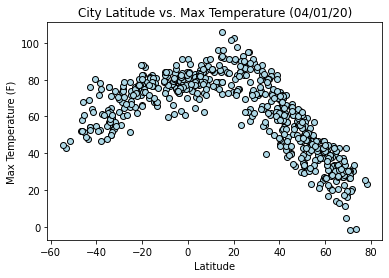

In [13]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

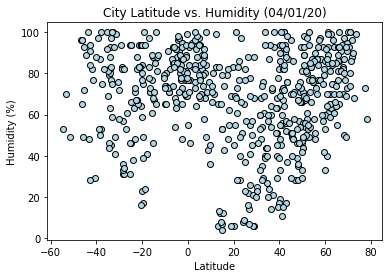

In [14]:
# Create a Scatter Plot for Humidity vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

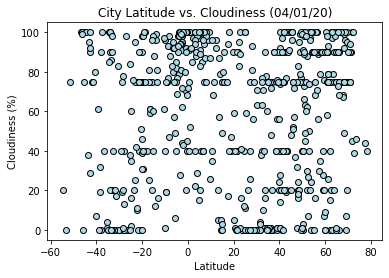

In [15]:
# Create a Scatter Plot for Cloudiness vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

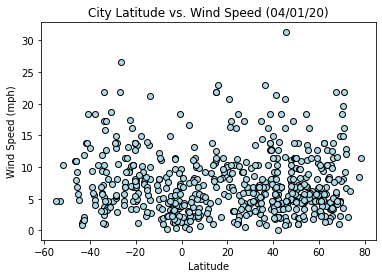

In [16]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


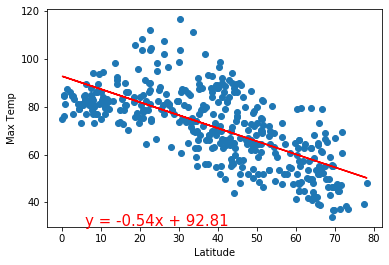

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


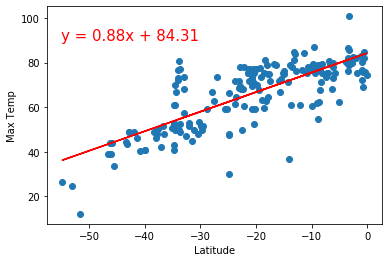

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


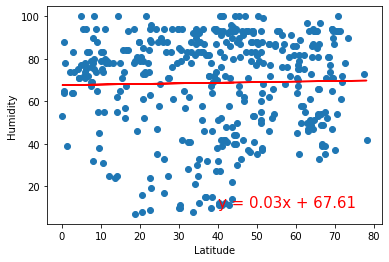

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


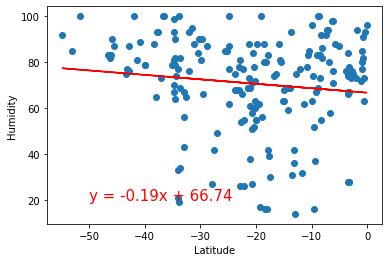

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


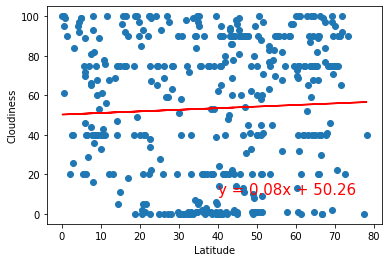

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


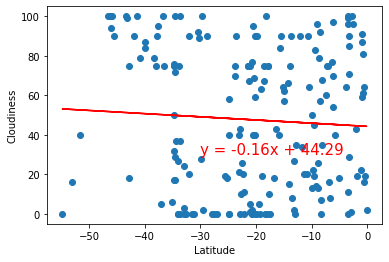

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


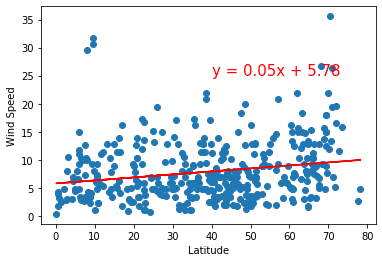

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


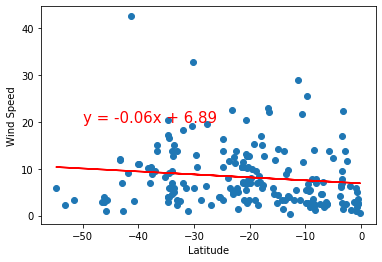